In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.model_selection import cross_val_score


df = pd.read_csv("Final_Final_Matrix.csv",  encoding="ISO-8859-1")
df

,Unnamed: 0,destination_id,Destination_name,destination_type_id,destination_longitude,destination_latitude,Continent,Activity,Business,Culture,...,Sports_Cross_Country_Skiing,Sports_Football,Sports_Golf,Sports_Hockey,Sports_Indoor_Skiing,Sports_Running,Sports_Skiing,Sports_Snowboarding,Sports_Soccer,Sports_Sports
0,1,8152.0,"Aarhus (and vicinity), Denmark",464,10.205722,56.153090,Europe,0.065862,0.071679,0.066627,...,0.063972,0.063972,0.076613,0.063972,0.063972,0.063972,0.066065,0.063972,0.063972,0.072581
1,2,8710.0,"Albany (and vicinity), Georgia, United States ...",464,-84.222600,31.617903,North America,0.066196,0.071493,0.065718,...,0.064658,0.064658,0.070058,0.064658,0.064658,0.064658,0.064658,0.064658,0.064658,0.081077
2,3,9485.0,"Akureyri, Iceland",557,-18.108450,65.723560,Europe,0.066806,0.064996,0.067070,...,0.066714,0.064391,0.070198,0.064391,0.064391,0.064391,0.067875,0.067875,0.064391,0.064391
3,4,10043.0,"Athens (and vicinity), Georgia, United States ...",464,-83.388577,33.957720,North America,0.065549,0.077219,0.064997,...,0.062860,0.077090,0.073633,0.062860,0.062860,0.062860,0.062860,0.062860,0.062860,0.101897
4,5,10105.0,"Al Hoceima, Morocco",557,-3.929738,35.240440,Africa,0.066726,0.066954,0.066821,...,0.069122,0.066520,0.066520,0.066520,0.066520,0.066520,0.069122,0.066520,0.066520,0.071725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4572,4573,196551190.0,"Kluang, Malaysia",557,103.336500,2.049263,Asia,0.067100,0.066375,0.067434,...,0.066375,0.066375,0.066375,0.066375,0.066375,0.066375,0.066375,0.066375,0.066375,0.066375
4573,4574,196552399.0,"Downtown Boston, Massachusetts, United States ...",774,-71.052750,42.360080,North America,0.059373,0.095148,0.072949,...,0.045634,0.060232,0.047296,0.060521,0.045634,0.045635,0.049420,0.045634,0.060232,0.102229
4574,4575,196556770.0,"Osaki, Tokyo, Japan",557,139.725600,35.620030,Asia,0.065458,0.072705,0.065136,...,0.062142,0.062142,0.062142,0.062142,0.062142,0.062142,0.062142,0.062142,0.062142,0.081527
4575,4576,196556925.0,"Tamachi, Tokyo, Japan",557,139.750100,35.644850,Asia,0.066345,0.073352,0.065315,...,0.065045,0.065045,0.065045,0.065045,0.065045,0.065045,0.065045,0.065045,0.065045,0.065045


In [101]:
X = df.iloc[:, 7:14] # Independent Variables
y = df.iloc[:,6] # Dependent Variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=206)

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000,random_state=206)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

model = KNeighborsClassifier()
# fit the model to the training data
model.fit(X_train, y_train)

predict = model.predict(X_test)

np.mean(model.predict(X_test) == y_test) 

model.score(X_test, y_test)

cm = confusion_matrix(y_test, model.predict(X_test))
cm


print(metrics.classification_report(model.predict(X_test), y_test))

               precision    recall  f1-score   support

       Africa       0.00      0.00      0.00        13
         Asia       0.25      0.25      0.25       102
    Australia       0.07      0.22      0.11         9
       Europe       0.65      0.48      0.56       477
North America       0.75      0.78      0.77       741
South America       0.15      0.41      0.22        32

     accuracy                           0.62      1374
    macro avg       0.31      0.36      0.32      1374
 weighted avg       0.66      0.62      0.63      1374



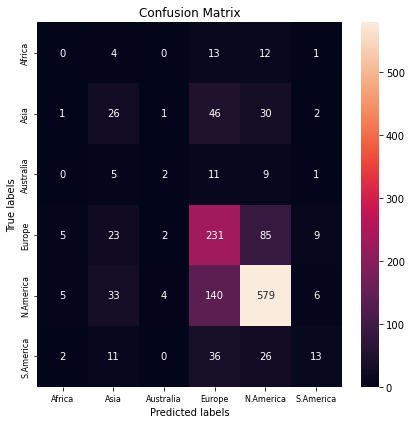

In [102]:
import seaborn as sns
fig,ax= plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

#annot=True to annotate cells, ftm='g' to disable scientific notatio
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Africa', 'Asia','Australia', 'Europe', 'N.America', 'S.America'],fontsize=8); 
ax.yaxis.set_ticklabels(['Africa', 'Asia','Australia', 'Europe', 'N.America', 'S.America'],fontsize=8);
plt.tight_layout()

In [103]:
model2 = KNeighborsClassifier()
scores = cross_val_score(model2, X, y, cv = 30)
scores

print(f"Accuracy: {scores.mean()} (+/- {scores.std()})")



Accuracy: 0.6035202385047588 (+/- 0.04470244835493288)


               precision    recall  f1-score   support

       Africa       0.18      0.33      0.24        55
         Asia       0.46      0.52      0.49       344
    Australia       0.25      0.54      0.35        52
       Europe       0.77      0.64      0.70      1532
North America       0.85      0.83      0.84      2446
South America       0.28      0.61      0.38       148

     accuracy                           0.73      4577
    macro avg       0.47      0.58      0.50      4577
 weighted avg       0.76      0.73      0.74      4577



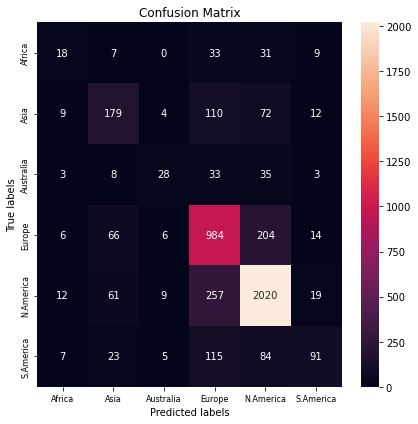

In [104]:
model = KNeighborsClassifier()
# fit the full model 
model.fit(X, y)

predict = model.predict(X)
model.score(X, y)
cm = confusion_matrix(y, predict)
cm
print(metrics.classification_report(model.predict(X), y))
#ConfusionMatrixDisplay(cm).plot()
fig,ax= plt.subplots(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

#annot=True to annotate cells, ftm='g' to disable scientific notatio
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Africa', 'Asia','Australia', 'Europe', 'N.America', 'S.America'],fontsize=8); 
ax.yaxis.set_ticklabels(['Africa', 'Asia','Australia', 'Europe', 'N.America', 'S.America'],fontsize=8);
plt.tight_layout()

In [105]:
df['KNN_Dummy'] = y == predict

In [106]:
df['KNN_Dummy']
df

,Unnamed: 0,destination_id,Destination_name,destination_type_id,destination_longitude,destination_latitude,Continent,Activity,Business,Culture,...,Sports_Football,Sports_Golf,Sports_Hockey,Sports_Indoor_Skiing,Sports_Running,Sports_Skiing,Sports_Snowboarding,Sports_Soccer,Sports_Sports,KNN_Dummy
0,1,8152.0,"Aarhus (and vicinity), Denmark",464,10.205722,56.153090,Europe,0.065862,0.071679,0.066627,...,0.063972,0.076613,0.063972,0.063972,0.063972,0.066065,0.063972,0.063972,0.072581,False
1,2,8710.0,"Albany (and vicinity), Georgia, United States ...",464,-84.222600,31.617903,North America,0.066196,0.071493,0.065718,...,0.064658,0.070058,0.064658,0.064658,0.064658,0.064658,0.064658,0.064658,0.081077,True
2,3,9485.0,"Akureyri, Iceland",557,-18.108450,65.723560,Europe,0.066806,0.064996,0.067070,...,0.064391,0.070198,0.064391,0.064391,0.064391,0.067875,0.067875,0.064391,0.064391,True
3,4,10043.0,"Athens (and vicinity), Georgia, United States ...",464,-83.388577,33.957720,North America,0.065549,0.077219,0.064997,...,0.077090,0.073633,0.062860,0.062860,0.062860,0.062860,0.062860,0.062860,0.101897,True
4,5,10105.0,"Al Hoceima, Morocco",557,-3.929738,35.240440,Africa,0.066726,0.066954,0.066821,...,0.066520,0.066520,0.066520,0.066520,0.066520,0.069122,0.066520,0.066520,0.071725,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4572,4573,196551190.0,"Kluang, Malaysia",557,103.336500,2.049263,Asia,0.067100,0.066375,0.067434,...,0.066375,0.066375,0.066375,0.066375,0.066375,0.066375,0.066375,0.066375,0.066375,False
4573,4574,196552399.0,"Downtown Boston, Massachusetts, United States ...",774,-71.052750,42.360080,North America,0.059373,0.095148,0.072949,...,0.060232,0.047296,0.060521,0.045634,0.045635,0.049420,0.045634,0.060232,0.102229,True
4574,4575,196556770.0,"Osaki, Tokyo, Japan",557,139.725600,35.620030,Asia,0.065458,0.072705,0.065136,...,0.062142,0.062142,0.062142,0.062142,0.062142,0.062142,0.062142,0.062142,0.081527,False
4575,4576,196556925.0,"Tamachi, Tokyo, Japan",557,139.750100,35.644850,Asia,0.066345,0.073352,0.065315,...,0.065045,0.065045,0.065045,0.065045,0.065045,0.065045,0.065045,0.065045,0.065045,False


In [107]:
df.to_csv('Final_Matrix_Dummy.csv')